# Titanic (2021. 1. 6.)

In [1]:
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

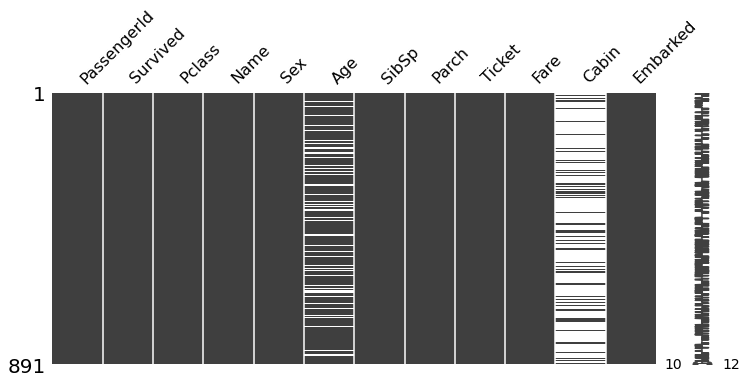

In [7]:
import missingno as msno
msno.matrix(train,figsize=(12,5))

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index= ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

def area_chart(feature):
    facet = sns.FacetGrid(train, hue='Survived', aspect=4)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, train[feature].max()))
    facet.add_legend()
    plt.show()

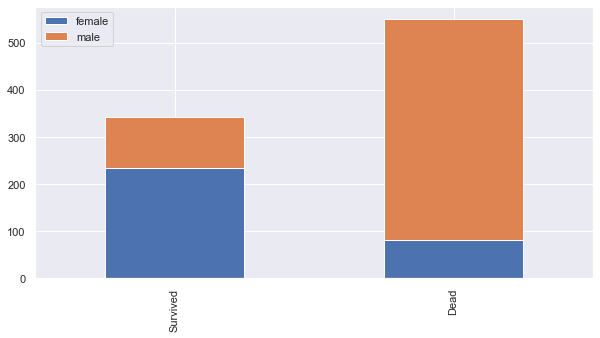

In [12]:
bar_chart('Sex')

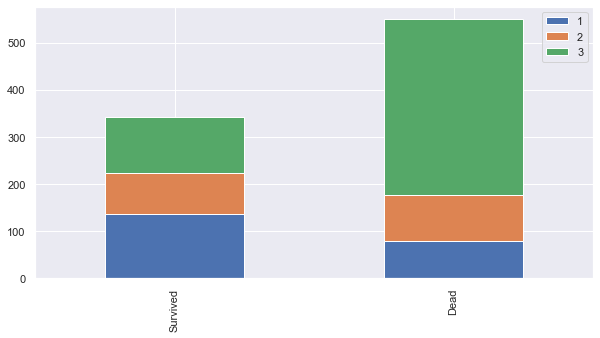

In [13]:
bar_chart('Pclass')

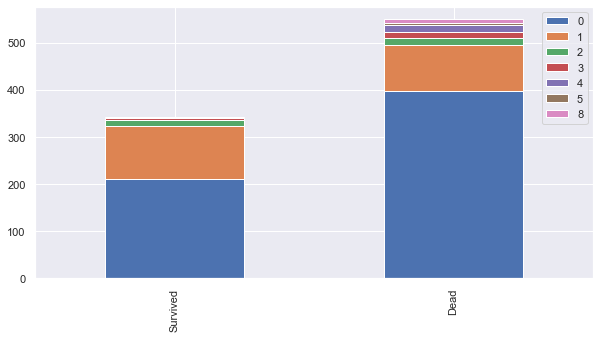

In [14]:
bar_chart('SibSp')

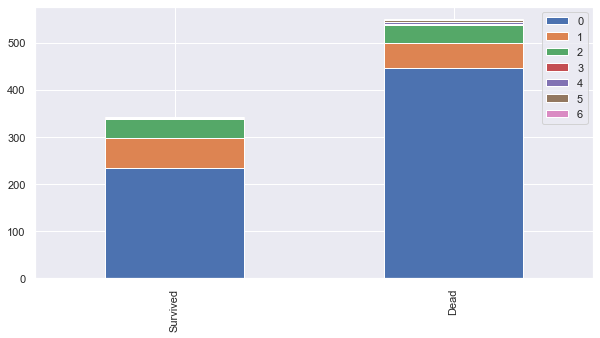

In [15]:
 bar_chart('Parch')

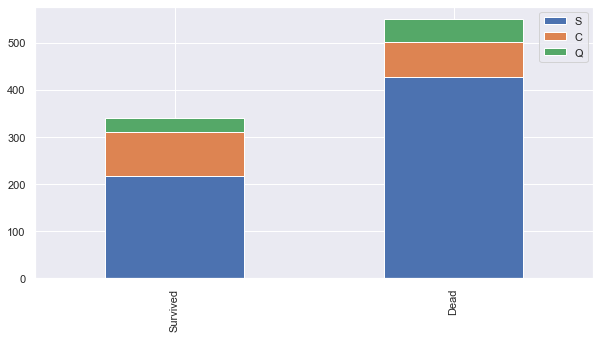

In [16]:
bar_chart('Embarked')

# Reature Engineering

# 1. Get Title from Name
Mr : 0
Miss : 1
Mrs : 2
Others : 3

In [17]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Capt          1
Countess      1
Mme           1
Jonkheer      1
Lady          1
Ms            1
Don           1
Sir           1
Name: Title, dtype: int64

In [19]:
title_mapping={
    "Mr": 0, "Miss": 1, "Mrs": 2
}
def title_mapper(title):
    try:
        return title_mapping[title]
    except:
        return 3
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapper)

In [20]:
train['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

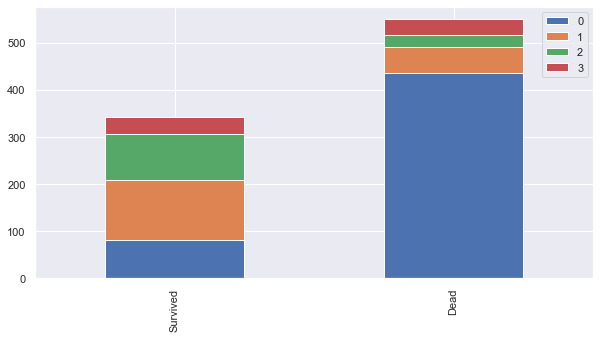

In [21]:
bar_chart('Title')

In [22]:
# Drop Name Field
for dataset in train_test_data:
    dataset.drop('Name', axis=1, inplace=True)

# 2. Sex

In [23]:
sex_mapping = {"male": 0, "female": 0}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping) 

# 3. Age

In [24]:
# fill missing age
for dataset in train_test_data:
    dataset['Age'].fillna(dataset.groupby("Title")['Age'].transform("median"), inplace=True)

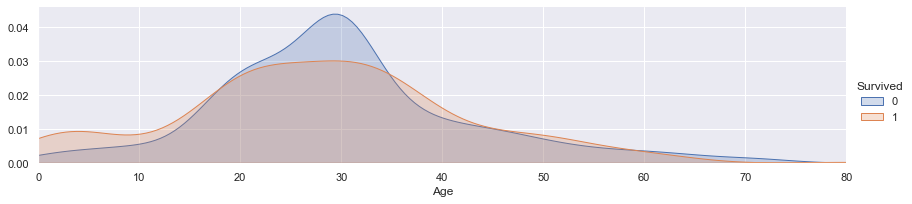

In [25]:
# Area graph
area_chart('Age')

## 3.1. Age Binning

Binning Numerical Age to Categorical Variable <br/>

child: 0 <br/>
young: 1 <br/>
adult: 2  <br/>
mid-age: 3 <br/>
senior: 4

In [26]:
def age_binning(age):
    if age <=16: return 0
    elif age <=26: return 1
    elif age <= 36: return 2
    elif age <= 62: return 3
    else: return 4

for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].map(age_binning)

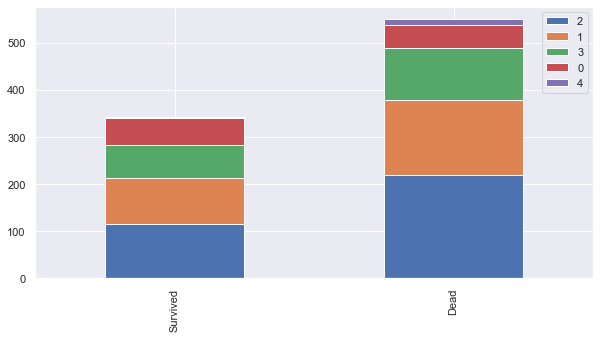

In [27]:
bar_chart('Age')

# 4. Embarked

<AxesSubplot:>

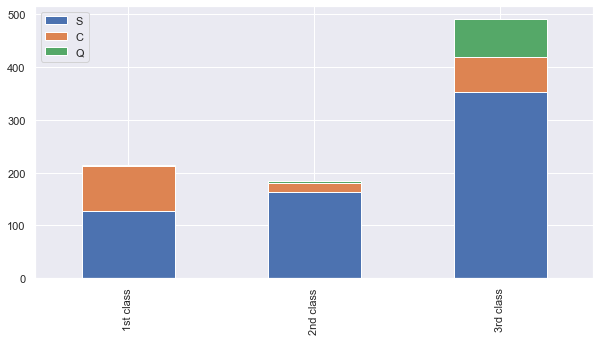

In [28]:
# Embarked - Pclass Chart
df = pd.DataFrame([ train[train['Pclass'] == p]['Embarked'].value_counts() for p in [1,2,3]])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [29]:
# fill Na and mapping
embarked_mapping = {
    'S': 0, 'C': 1, 'Q': 2
}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S').map(embarked_mapping)


# 5. Fare

In [30]:
# fill missing fare : median of same pclass
for dataset in train_test_data:
    dataset['Fare'].fillna(dataset.groupby("Pclass")['Fare'].transform("median"), inplace=True)

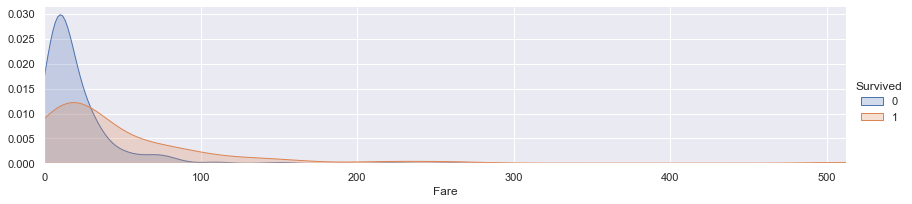

In [31]:
area_chart('Fare')

## 5.1. Fare Binning

~ 17 : 0 <br>
17 ~  30 : 1 <br>
30 ~ 100 : 2 <br>
100 ~     : 3 <br>


In [32]:
def fare_binning(fare):
    if fare <=17: return 0
    elif fare <=30: return 1
    elif fare <= 100: return 2
    else: return 3

for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].map(fare_binning)

# 6. Cabin

In [33]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F2             3
              ..
E34            1
D21            1
B4             1
B73            1
B102           1
Name: Cabin, Length: 147, dtype: int64

In [34]:
# Get first Character
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

<AxesSubplot:>

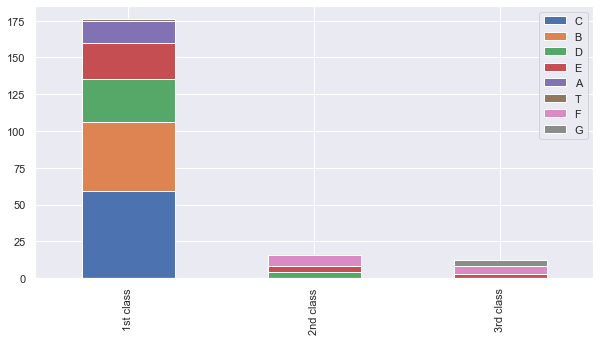

In [35]:
# Cabin - Pclass Chart
df = pd.DataFrame([ train[train['Pclass'] == p]['Cabin'].value_counts() for p in [1,2,3]])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [36]:
# cabin mapping
# scale: 0.3
cabin_mapping = {
    'A': 0, 'B': 0.3, 'C': 0.6,
    'D': 0.9, 'E': 1.2, 'F': 1.5,
    'G': 1.8, 'T': 2.1
}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [37]:
for dataset in train_test_data:
    dataset['Cabin'].fillna(dataset.groupby('Pclass')['Cabin'].transform("median"), inplace=True)

# 7. Family Size

In [38]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1

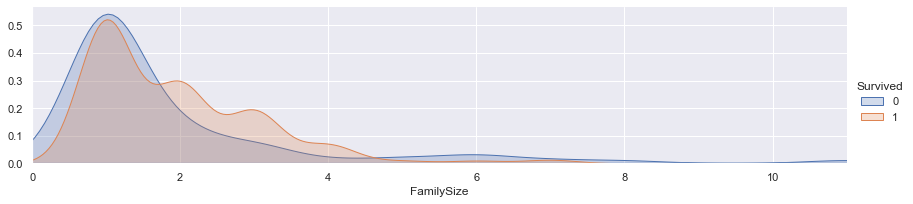

In [39]:
area_chart('FamilySize')

In [40]:
# Family Size scaling
scale = 0.5
for dataset in train_test_data:
    dataset['FamilySize'] = (dataset['FamilySize']-1)*scale

In [41]:
# Drop Fields : Parch, SibSp, Ticket
features_drop = ['Parch', 'SibSp', 'Ticket']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train = train.drop('PassengerId', axis=1)

In [42]:
# Extract target(Survived) data
train_data = train.drop('Survived', axis=1)
train_target = train['Survived']

train_data.shape, train_target.shape

((891, 8), (891,))

# Modeling

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

 # Cross Validation (K-fold)

In [44]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1,0,1.5,0,0,0.5
1,1,0,3,2,0.6,1,2,0.5
2,3,0,1,0,1.5,0,1,0.0
3,1,0,2,2,0.6,0,2,0.5
4,3,0,2,0,1.5,0,0,0.0


In [45]:
def test_model(classifier):
    scoring = 'accuracy'
    score = cross_val_score(classifier, train_data, train_target, cv=k_fold, n_jobs=1)
    print('Scores: ', score)
    print('Average Score: ', round(100*sum(score)/len(score), 2))


# 1. kNN

In [46]:
test_model(
    KNeighborsClassifier(n_neighbors=13)
)

Scores:  [0.8        0.75280899 0.79775281 0.82022472 0.84269663 0.79775281
 0.84269663 0.7752809  0.83146067 0.83146067]
Average Score:  80.92


# 2. Decision Tree

In [47]:
test_model(
    DecisionTreeClassifier()
)

Scores:  [0.75555556 0.82022472 0.7752809  0.76404494 0.86516854 0.7752809
 0.84269663 0.82022472 0.75280899 0.78651685]
Average Score:  79.58


# 3. Random Forest

In [48]:
test_model(
    RandomForestClassifier(n_estimators=13)
)

Scores:  [0.76666667 0.84269663 0.79775281 0.75280899 0.87640449 0.80898876
 0.83146067 0.82022472 0.74157303 0.80898876]
Average Score:  80.48


# 4. Naive Bayes

In [49]:
test_model(
    GaussianNB()
)

Scores:  [0.74444444 0.75280899 0.69662921 0.64044944 0.71910112 0.78651685
 0.70786517 0.71910112 0.71910112 0.69662921]
Average Score:  71.83


# 5. SVM (selected)

In [50]:
test_model(
    SVC()
)

Scores:  [0.82222222 0.76404494 0.83146067 0.80898876 0.84269663 0.82022472
 0.83146067 0.85393258 0.84269663 0.86516854]
Average Score:  82.83


# Testing

In [51]:
clf = SVC()
clf.fit(train_data, train_target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction= clf.predict(test_data)

submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})

In [52]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [53]:
submission.to_csv('submission.csv', index=False)

In [54]:
pd.read_csv('submission.csv').head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
